In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
sns.set(font="Arial")
sns.set_context("paper")
mpl.rcParams['font.family'] = 'Arial'


In [10]:
adata = sc.read_h5ad("/path/to/data/20240229_from_rocio_for_manuscript.h5ad")
adata.obs["Cell State"] = adata.obs["ident"].copy().astype(str)
adata.obs.loc[adata.obs['Cell State']=="CD4_Disfunctional", "Cell State"] = "CD4_Dysfunctional"
adata.obs.loc[adata.obs['Cell State']=="CD4_Early_Disfuncional", "Cell State"] = "CD4_Early_Dysfunctional"

In [11]:
for i in adata.obs["Cell State"].unique():
    print(i)

CD8_Activated
CD8_Resting_Memory
CD4_Early_Activated
CD8_Early_Cytotoxic
CD8_Cycling_Effector
CD4_Activated_Memory
CD4_Resting Memory
CD8_Cycling
CD4_Early_Dysfunctional
CD8_Late_Bystander
Terminal
CD4_Activated
CD4_Cycling
CD4_T-reg_like
CD4_Dysfunctional
CD8_Late_Cytotoxic


/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.ma

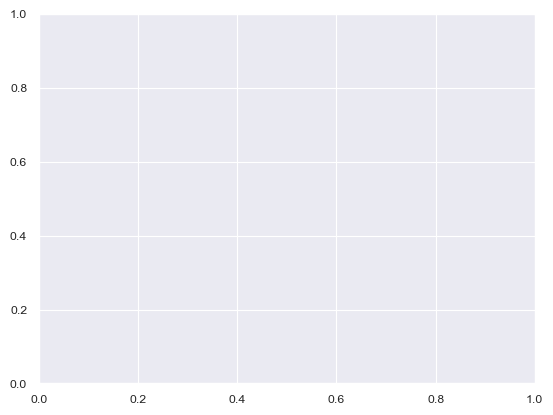

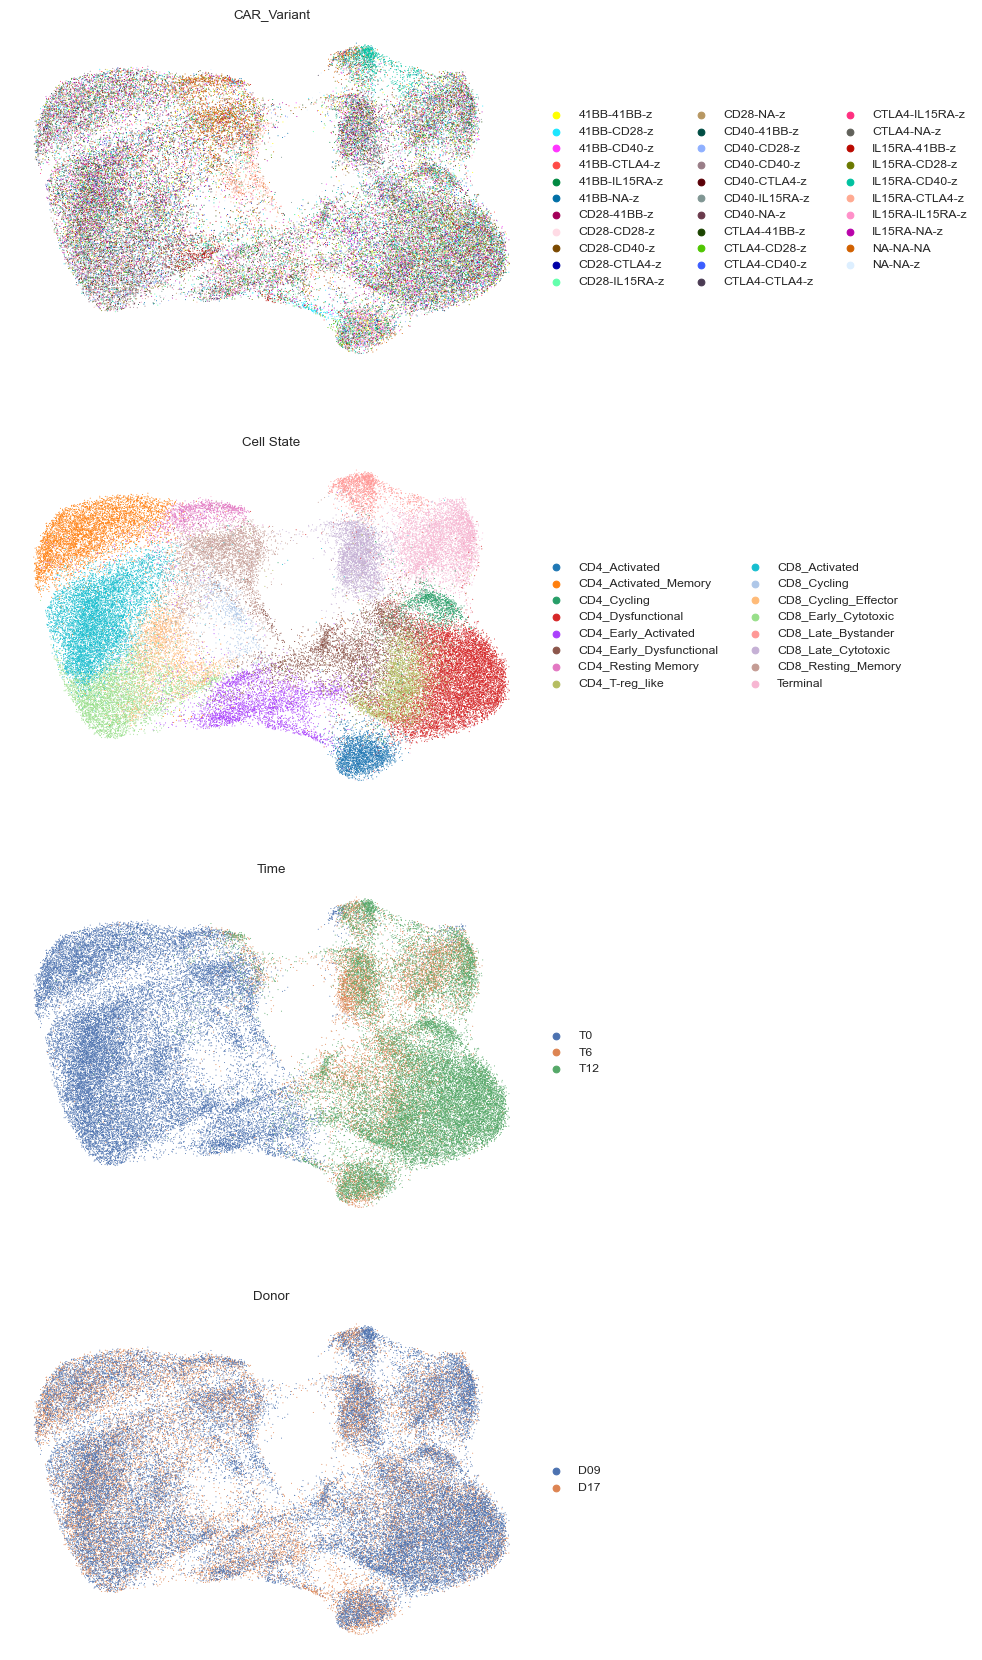

In [14]:
sc.pl.umap(adata, color=["CAR_Variant", "Cell State", "Time", "Donor"], frameon=False, ncols=1,
          show=False)
plt.savefig("/path/to/figures/UMAPs.png", bbox_inches = "tight", dpi=600)
plt.savefig("/path/to/figures/UMAPs.pdf", bbox_inches = "tight", dpi=300)

In [15]:
CD4_adata = adata[adata.obs["subset"]=="CD4"]
CD8_adata = adata[adata.obs["subset"]=="CD8"]

In [16]:
sc.pp.neighbors(CD4_adata, use_rep="HARMONY")
sc.tl.umap(CD4_adata)

sc.pp.neighbors(CD8_adata, use_rep="HARMONY")
sc.tl.umap(CD8_adata)

/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/adr/miniconda3/envs/cmonge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.ma

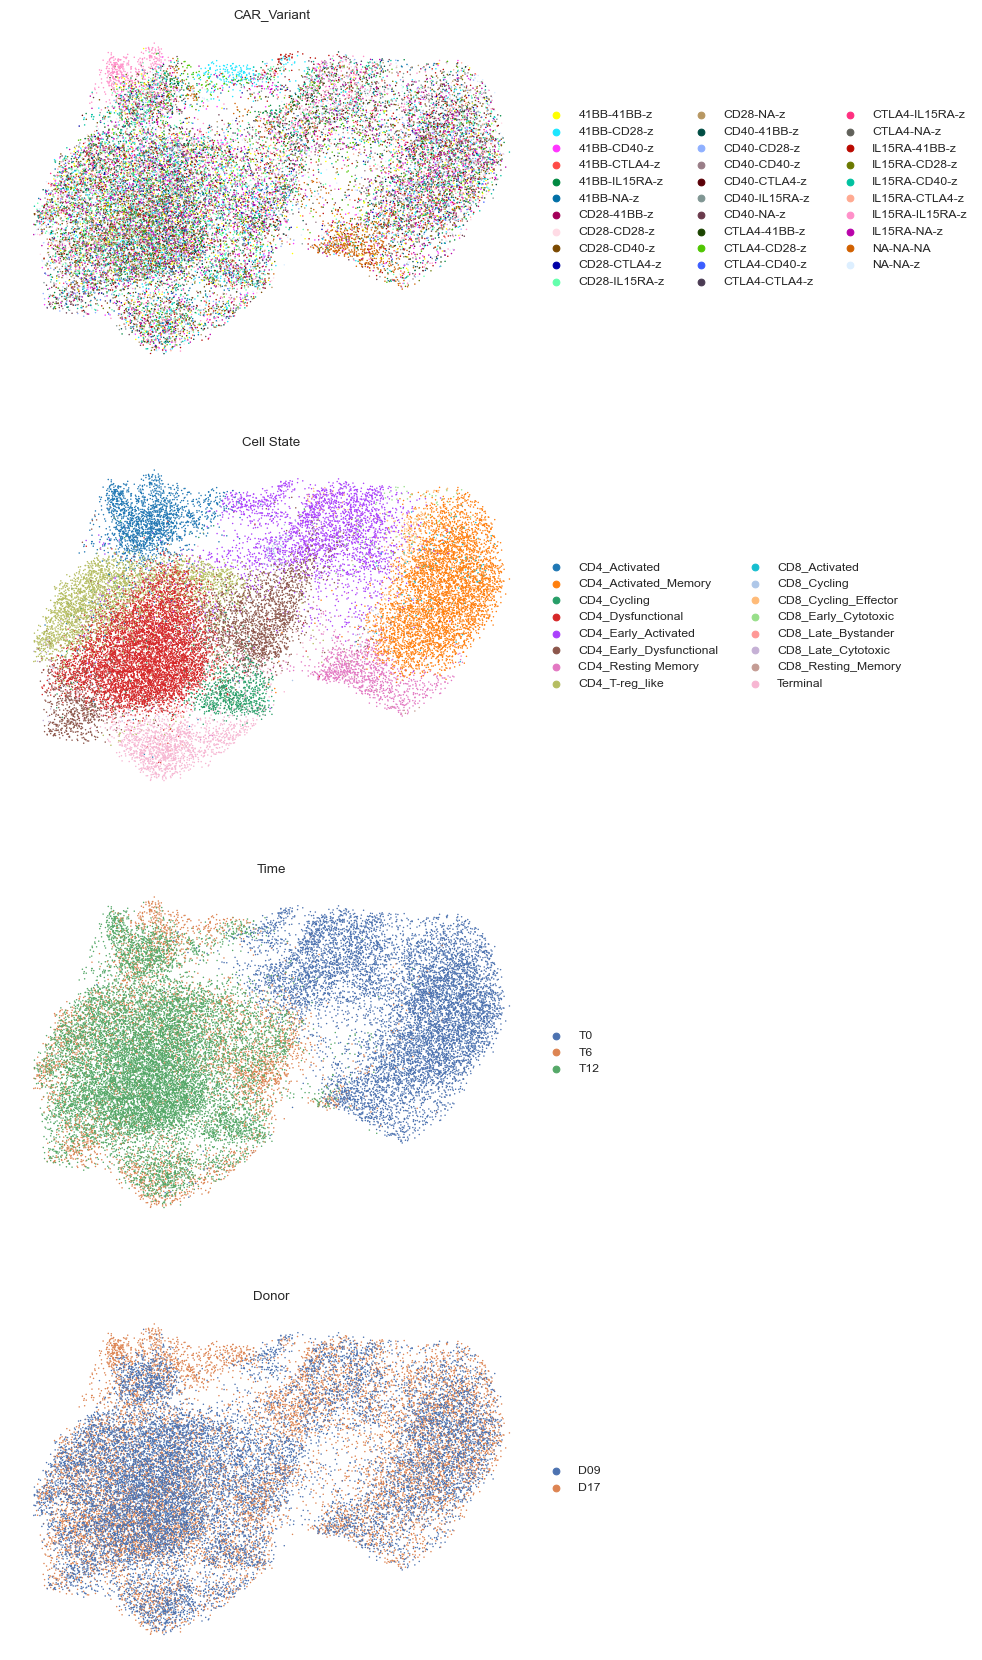

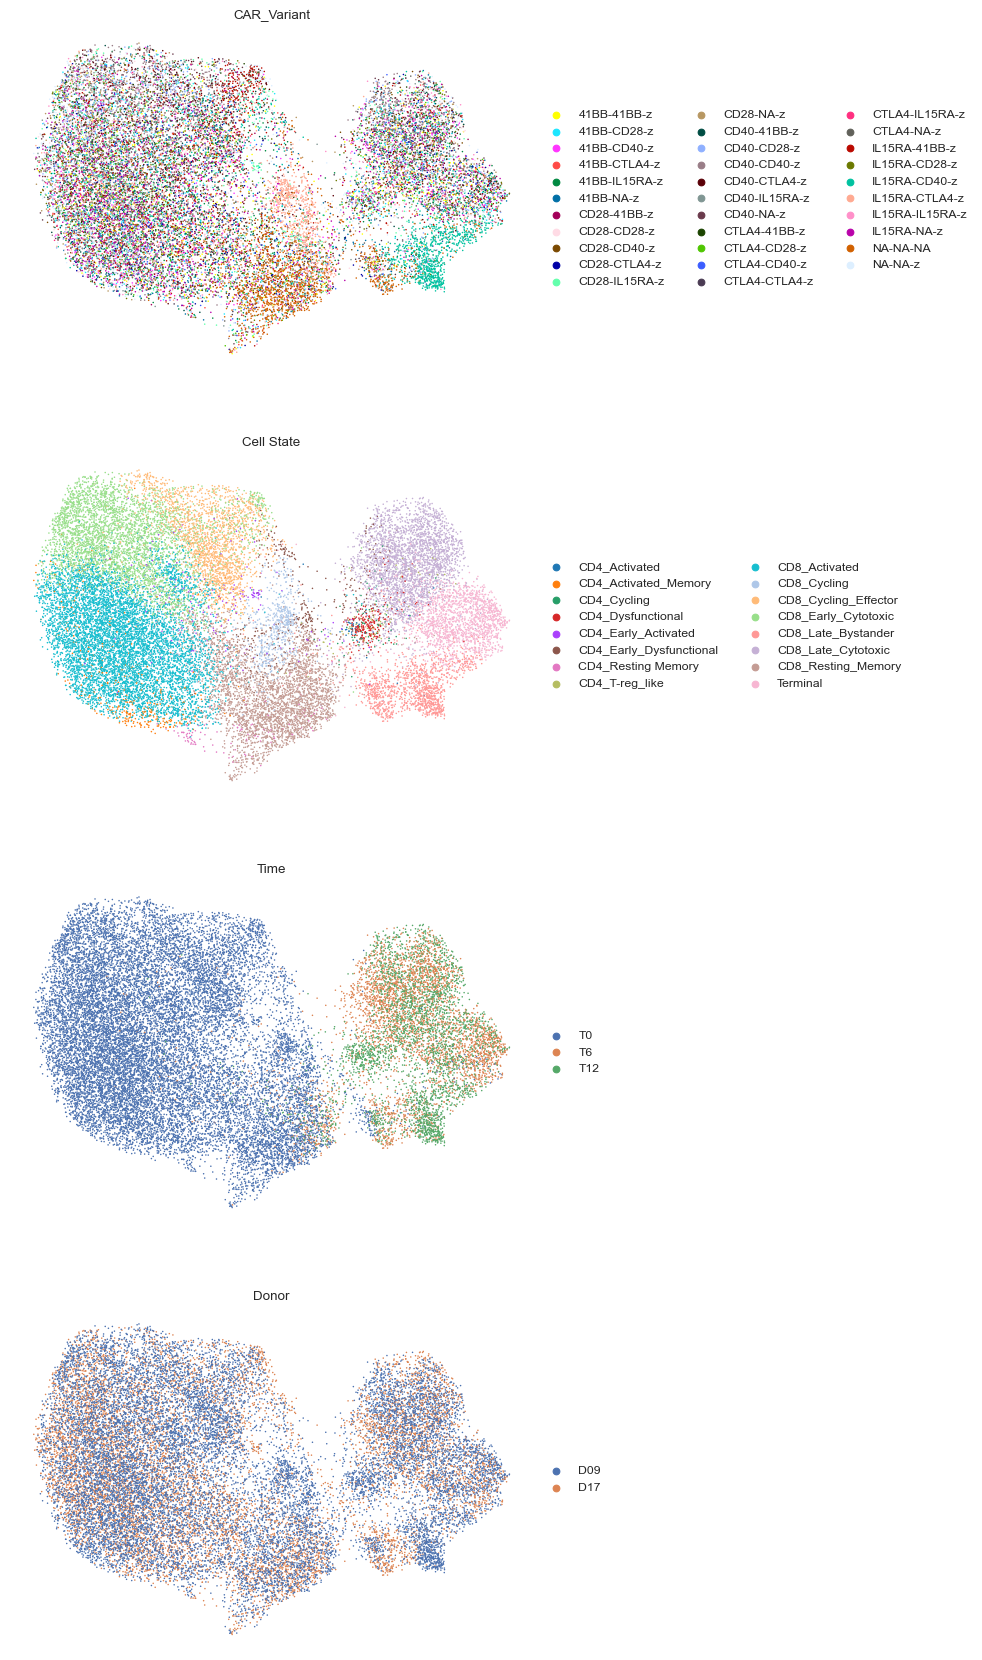

In [17]:
with plt.rc_context():
    
    sc.pl.umap(CD4_adata, color=["CAR_Variant", "Cell State", "Time", "Donor"], frameon=False, ncols=1,
              show=False)
    plt.savefig("/path/to/figures/CD4_UMAPs.png", bbox_inches = "tight", dpi=600)
    plt.savefig("/path/to/figures/CD4_UMAPs.pdf", bbox_inches = "tight", dpi=300)
    
    sc.pl.umap(CD8_adata, color=["CAR_Variant", "Cell State", "Time", "Donor"], frameon=False, ncols=1,
              show=False)
    plt.savefig("/path/to/figures/CD8_UMAPs.png", bbox_inches = "tight", dpi=600)
    plt.savefig("/path/to/figures/CD8_UMAPs.pdf", bbox_inches = "tight", dpi=300)